# Example standard calculations

## Import library

In [17]:
from pyanp.anp import *

## Graphing setup

In [18]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/wjadams/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['mat']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,7)

## Load model

In [20]:
nets = anp_from_excel("data1.xlsx")

# Alternative scores

## Group Scores

alt1    0.298886
alt2    0.336793
alt3    0.364321
dtype: float64

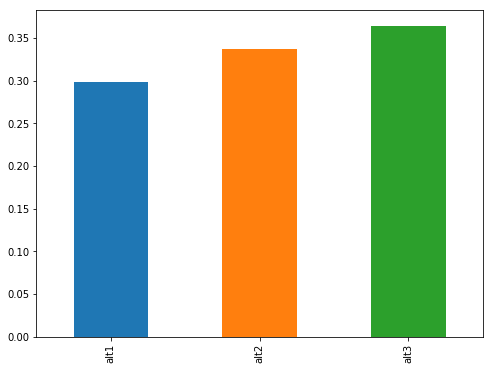

In [21]:
group_scores=nets.priority()
group_scores.plot(kind="bar", figsize=(8,6))
display(group_scores)

## Everyone's scores

In [22]:
all_scores=nets.priority_df()
all_scores

,Group Average,Bill,Leanne,Jay,Kathy,Elena,Lazaros
alt1,0.298886,0.168693,0.263527,0.473419,0.231605,0.340888,0.412917
alt2,0.336793,0.341296,0.330410,0.228327,0.404470,0.268592,0.283239
alt3,0.364321,0.490012,0.406063,0.298254,0.363925,0.390520,0.303844


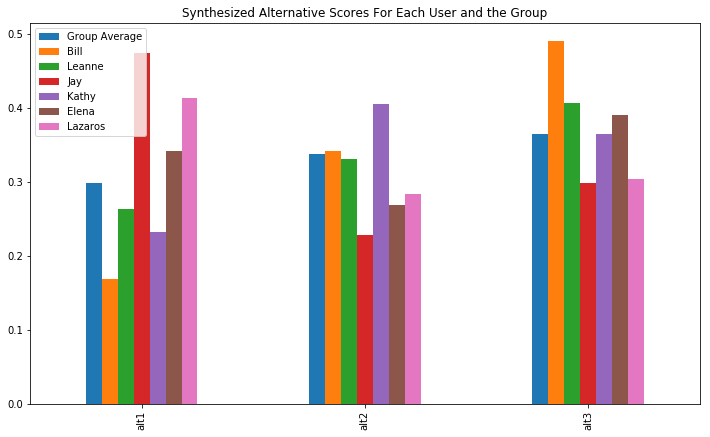

In [7]:
all_scores.plot(kind="bar")
plt.title("Synthesized Alternative Scores For Each User and the Group")
plt.show()

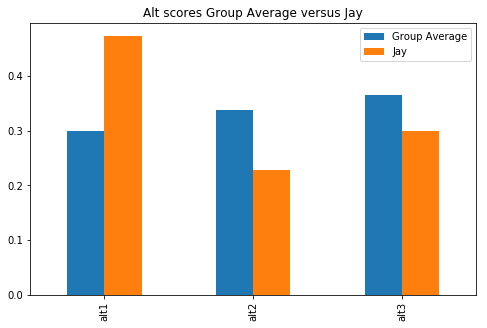

In [8]:
# Jay versus group average
nets.priority_df([None, "Jay"]).plot(kind="bar", figsize=(8, 5))
plt.title("Alt scores Group Average versus Jay")
plt.show()

# Global priorities

## Group Average global priority only

c1-1    0.077536
c1-2    0.078404
c1-3    0.091836
c2-1    0.157147
c2-2    0.081689
c2-3    0.098150
alt1    0.124109
alt2    0.139850
alt3    0.151280
dtype: float64

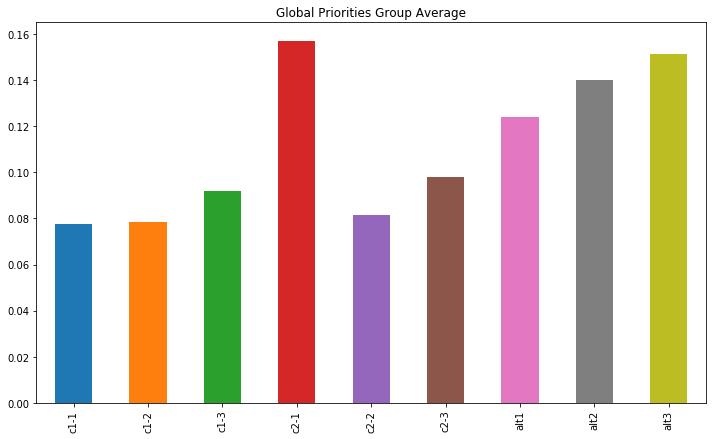

In [9]:
gp = nets.global_priority()
display(gp)
gp.plot(kind="bar")
plt.title("Global Priorities Group Average")
plt.show()

## Everyone's group priorities

,Group Average,Bill,Leanne,Jay,Kathy,Elena,Lazaros
c1-1,0.077536,0.210710,0.025511,0.071365,0.084469,0.111800,0.111803
c1-2,0.078404,0.065000,0.029758,0.052165,0.112070,0.147623,0.123241
c1-3,0.091836,0.121930,0.039841,0.043428,0.106067,0.091733,0.120054
c2-1,0.157147,0.297071,0.189294,0.106109,0.045296,0.097481,0.175640
c2-2,0.081689,0.060590,0.097908,0.078905,0.045545,0.047650,0.158534
c2-3,0.098150,0.078972,0.128410,0.042522,0.091867,0.054560,0.099149
alt1,0.124109,0.027957,0.128938,0.286657,0.119204,0.153111,0.087365
alt2,0.139850,0.056562,0.161662,0.138253,0.208175,0.120639,0.059928
alt3,0.151280,0.081208,0.198678,0.180594,0.187308,0.175403,0.064287


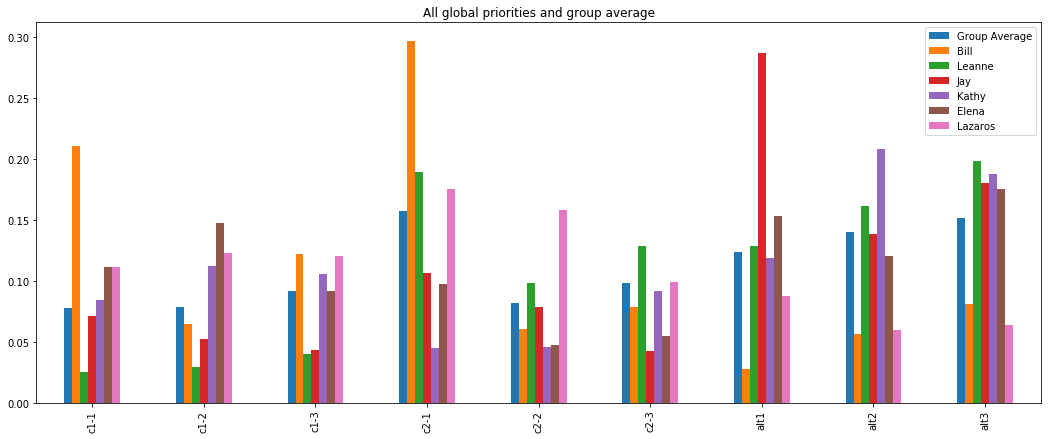

In [10]:
gpd = nets.global_priority_df()
display(gpd)
gpd.plot(kind="bar", figsize=(18,7))
plt.title("All global priorities and group average")
plt.show()

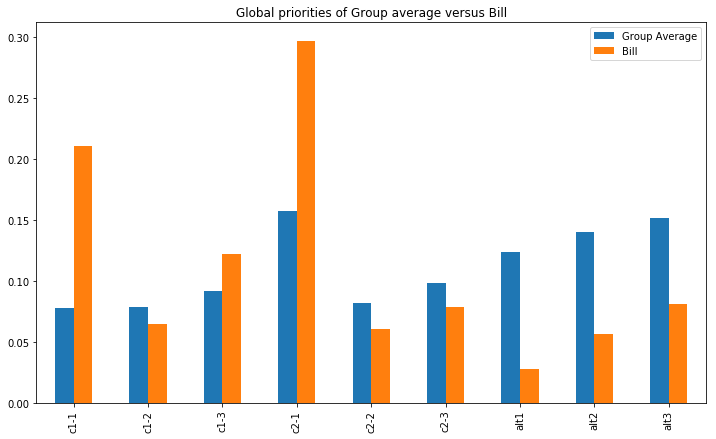

In [11]:
# Global priorities of Bill versus group average
nets.global_priority_df([None, "Bill"]).plot(kind="bar")
plt.title("Global priorities of Group average versus Bill")
plt.show()

# Sensitivity

In [12]:
mat = nets.scaled_supermatrix(as_df=True)
mat

,c1-1,c1-2,c1-3,c2-1,c2-2,c2-3,alt1,alt2,alt3
c1-1,0.000000,0.000000,0.000000,0.092328,0.192623,0.163736,0.073323,0.098980,0.054727
c1-2,0.000000,0.000000,0.000000,0.146266,0.161149,0.087449,0.109311,0.064478,0.073291
c1-3,0.000000,0.000000,0.000000,0.214256,0.099078,0.201665,0.046564,0.065740,0.101180
c2-1,0.279041,0.168450,0.228521,0.000000,0.000000,0.000000,0.213692,0.249956,0.263355
c2-2,0.114225,0.048040,0.141677,0.000000,0.000000,0.000000,0.168045,0.120061,0.121684
c2-3,0.141125,0.317900,0.164192,0.000000,0.000000,0.000000,0.110936,0.122656,0.107634
alt1,0.120070,0.156815,0.158169,0.140652,0.146634,0.226274,0.079987,0.079355,0.070488
alt2,0.174035,0.117515,0.228162,0.218891,0.161800,0.108146,0.086641,0.104844,0.082913
alt3,0.171504,0.191279,0.079278,0.187607,0.238716,0.212730,0.111501,0.093930,0.124728


In [13]:
from pyanp.rowsens import *

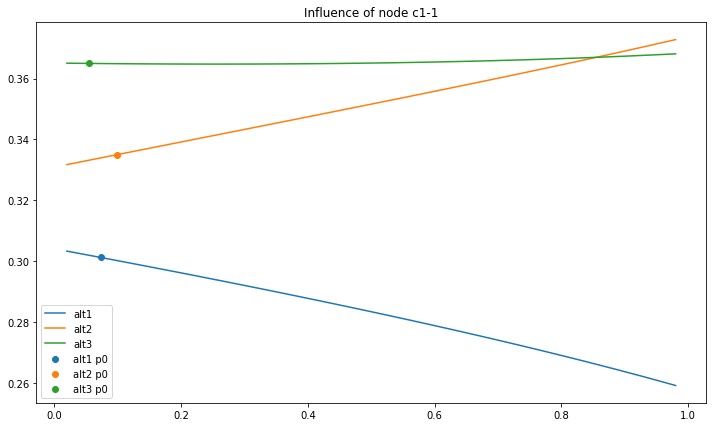

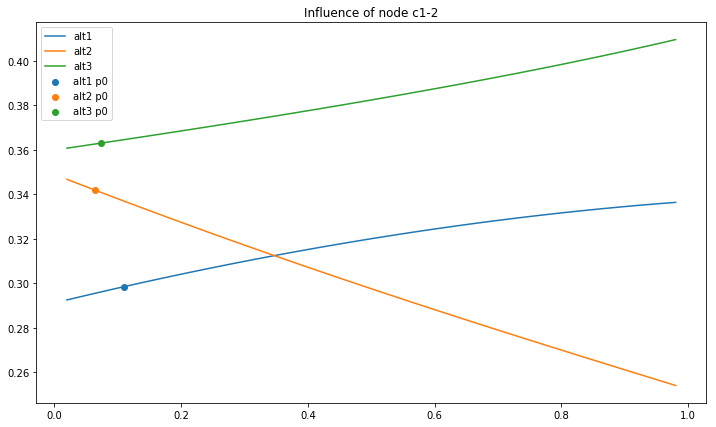

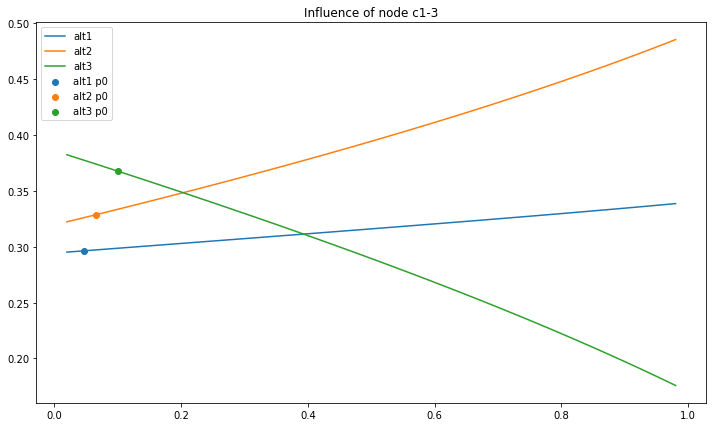

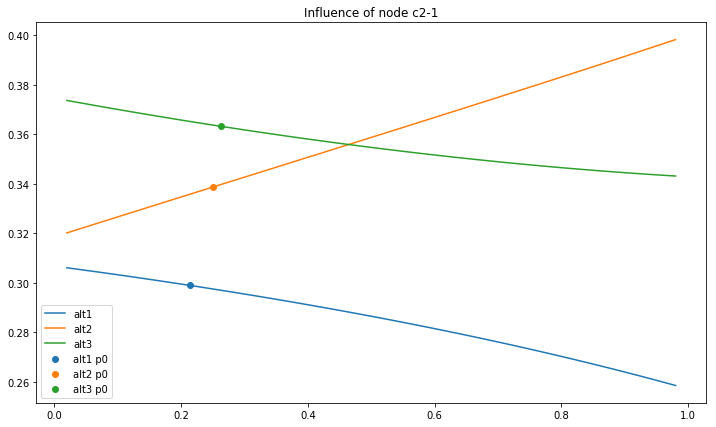

Count was 0
Count was 0
Count was 0


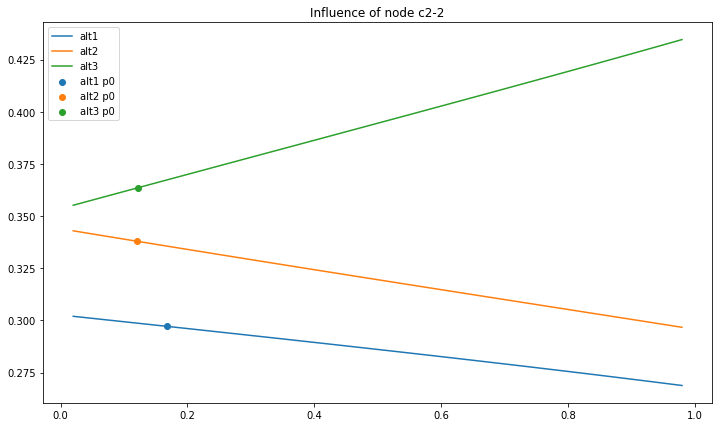

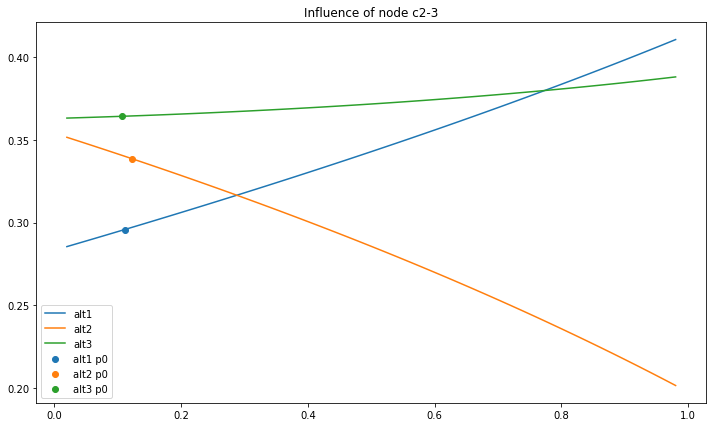

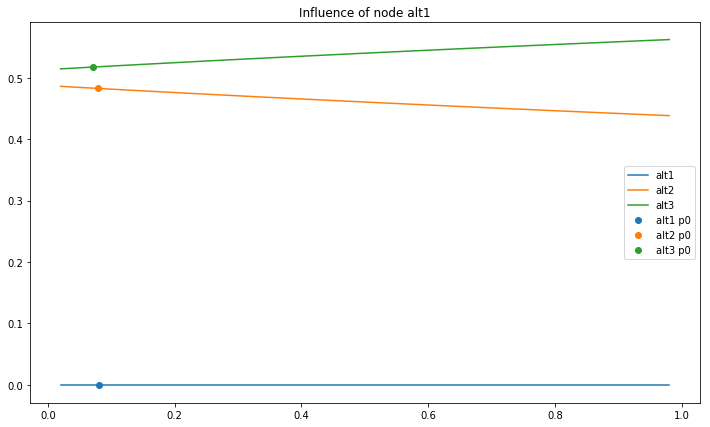

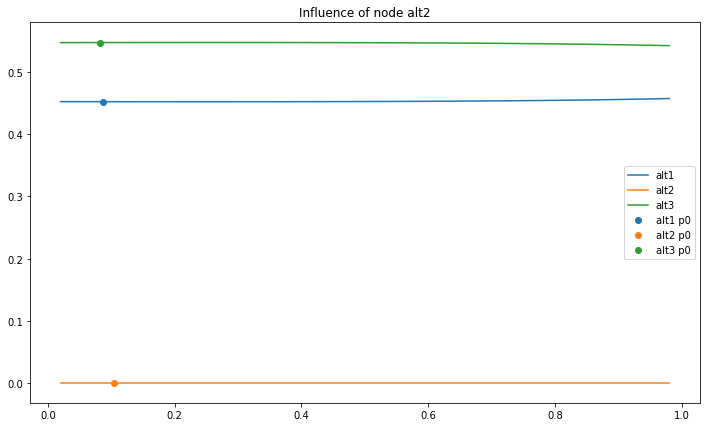

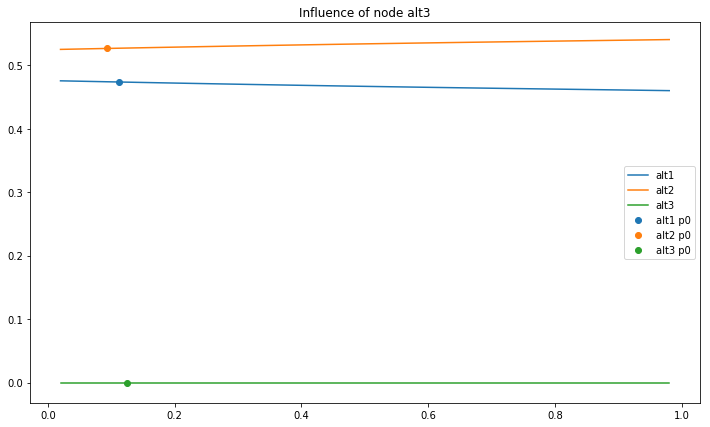

In [14]:
nodes = nets.node_names()
# What indices are the alternatives in this network
alts_pos = (6, 7, 8)
for nodepos in range(len(nodes)):
    plt.title("Influence of node "+nodes[nodepos])
    influence_table(mat=mat.values, row=nodepos, influence_nodes=alts_pos, node_names = nodes)
    plt.show()

# Inconsistency

## Node inconsistency

In [15]:
nets.node_incon_std_df()

,"(c1-1, Cluster2)","(c1-1, Alternatives)","(c1-2, Cluster2)","(c1-2, Alternatives)","(c1-3, Cluster2)","(c1-3, Alternatives)","(c2-1, Cluster1)","(c2-1, Alternatives)","(c2-2, Cluster1)","(c2-2, Alternatives)",...,"(c2-3, Alternatives)","(alt1, Cluster1)","(alt1, Cluster2)","(alt1, Alternatives)","(alt2, Cluster1)","(alt2, Cluster2)","(alt2, Alternatives)","(alt3, Cluster1)","(alt3, Cluster2)","(alt3, Alternatives)"
Group Average,0.028610,0.472476,0.373301,0.010691,0.044646,0.001441,0.061729,0.000378,0.002211,0.004452,...,0.120669,0.017755,0.305534,0.016255,0.069472,0.086898,0.041887,0.125727,0.005375,0.305534
Bill,0.197998,4.083285,0.425981,0.463461,0.164491,0.051559,0.027946,2.359894,0.070686,0.051559,...,0.017591,0.003552,0.431587,0.070686,1.658977,0.480769,0.480769,0.070686,0.524931,0.353309
Leanne,0.539263,0.539263,0.418932,0.020894,0.838166,0.140384,0.698287,0.003552,0.539263,0.051559,...,3.474074,0.325896,0.000000,0.431587,1.183827,0.246799,0.130395,1.282051,2.163462,2.308214
Jay,3.366827,2.747146,0.073476,1.183827,0.170123,1.200672,0.090399,3.089199,0.307229,0.681675,...,0.130395,1.543058,0.539263,0.174491,0.096090,0.259142,0.301330,4.821041,0.558087,1.374098
Kathy,2.459490,0.418932,0.409800,0.963762,0.838166,2.163462,0.480769,0.594802,5.052268,0.017591,...,0.017591,0.353309,4.899900,1.965702,1.374098,0.539263,2.857875,0.698287,0.000000,0.160256
Elena,0.008849,0.130395,0.051559,0.130395,0.353309,0.000000,1.078254,0.881435,0.450295,0.033555,...,0.425981,1.078254,1.041174,3.676275,0.209002,1.432483,0.090399,0.090399,0.013608,0.051559
Lazaros,1.078254,0.051559,3.474074,2.443220,0.017591,3.076923,0.246799,2.443220,0.307229,0.209002,...,0.770265,0.353309,4.006410,0.027946,0.246799,0.051559,0.051559,0.005322,0.418932,0.681675


## Cluster comparison inconsistency

In [16]:
nets.cluster_incon_std_df()

,Cluster1,Cluster2,Alternatives
Group Average,0.0,0.000000e+00,0.021151
Bill,0.0,0.000000e+00,1.767344
Leanne,0.0,4.440892e-16,0.139275
Jay,0.0,0.000000e+00,2.273008
Kathy,0.0,0.000000e+00,1.374098
Elena,0.0,4.440892e-16,4.572386
Lazaros,0.0,0.000000e+00,0.130395
